Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

Data loading

In [2]:
df = pd.read_csv("oferty_pracy_excel.csv", encoding = "utf-8", delimiter=";")

Some data cleaning: change "kod" to "TERYT" (not sure if mandatory), changing letters to lower (also not sure)

In [3]:
df.rename(columns={"kod": "TERYT"}, inplace=True)
df.region = df.region.str.lower()
df

,TERYT,region,oferty
0,200000,dolnośląskie,10 732
1,400000,kujawsko-pomorskie,6 570
2,600000,lubelskie,4 530
3,800000,lubuskie,4 627
4,1000000,łódzkie,13 261
5,1200000,małopolskie,8 529
6,1400000,mazowieckie,16 427
7,1600000,opolskie,3 020
8,1800000,podkarpackie,5 162
9,2000000,podlaskie,2 351


Read map file

In [4]:
mapa_woj = gpd.read_file("Wojewodztwa\Województwa.shp")

In [5]:
mapa_woj.columns

Index(['JPT_SJR_KO', 'JPT_KOD_JE', 'JPT_NAZWA_', 'JPT_ORGAN_', 'JPT_JOR_ID',
       'WERSJA_OD', 'WERSJA_DO', 'WAZNY_OD', 'WAZNY_DO', 'JPT_KOD__1',
       'JPT_NAZWA1', 'JPT_ORGAN1', 'JPT_WAZNA_', 'ID_BUFORA_', 'ID_BUFORA1',
       'ID_TECHNIC', 'IIP_PRZEST', 'IIP_IDENTY', 'IIP_WERSJA', 'JPT_KJ_IIP',
       'JPT_KJ_I_1', 'JPT_KJ_I_2', 'JPT_OPIS', 'JPT_SPS_KO', 'ID_BUFOR_1',
       'JPT_ID', 'JPT_KJ_I_3', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

Leave only columns which are interesting for us.

In [6]:
mapa_woj = mapa_woj[['JPT_KOD_JE', 'geometry']] 


What does the JPT_KOD_JE colum (i.e. TERYT code) look like in both dataframes?

In [7]:
mapa_woj.JPT_KOD_JE.head()

0    24
1    16
2    26
3    22
4    20
Name: JPT_KOD_JE, dtype: object

In [8]:
df.TERYT.head()

0     200000
1     400000
2     600000
3     800000
4    1000000
Name: TERYT, dtype: int64

Well, they differ and we have to unify them.

In [9]:
df.TERYT = df.TERYT.apply(lambda x: str(x)[:2] if len(str(x))>6 else '0'+str(x)[0])

Merge both files.

In [10]:
df.TERYT = df.TERYT.astype("object")

In [11]:
df

,TERYT,region,oferty
0,02,dolnośląskie,10 732
1,04,kujawsko-pomorskie,6 570
2,06,lubelskie,4 530
3,08,lubuskie,4 627
4,10,łódzkie,13 261
5,12,małopolskie,8 529
6,14,mazowieckie,16 427
7,16,opolskie,3 020
8,18,podkarpackie,5 162
9,20,podlaskie,2 351


In [12]:
df_mapa = pd.merge(mapa_woj, df, how="left", left_on="JPT_KOD_JE", right_on="TERYT")
df_mapa

,JPT_KOD_JE,geometry,TERYT,region,oferty
0,24,"MULTIPOLYGON (((494179.526 358814.295, 494173....",24,śląskie,15 613
1,16,"POLYGON ((417001.841 369554.248, 417005.901 36...",16,opolskie,3 020
2,26,"POLYGON ((549668.108 320839.847, 549676.668 32...",26,świętokrzyskie,2 513
3,22,"POLYGON ((414159.332 769636.478, 414269.395 76...",22,pomorskie,8 167
4,20,"POLYGON ((700075.252 572284.982, 700055.491 57...",20,podlaskie,2 351
5,32,"POLYGON ((225874.333 694332.554, 231446.660 69...",32,zachodniopomorskie,8 080
6,02,"POLYGON ((229358.510 402830.704, 229362.963 40...",02,dolnośląskie,10 732
7,30,"POLYGON ((347736.460 606210.458, 347736.779 60...",30,wielkopolskie,9 567
8,18,"POLYGON ((713790.986 331036.437, 713798.945 33...",18,podkarpackie,5 162
9,12,"POLYGON ((568911.289 294804.269, 568909.081 29...",12,małopolskie,8 529


In [13]:
df_mapa['oferty'] = df_mapa.dropna()['oferty'].str.replace(" ", "").astype("int64")

In [14]:
min(df_mapa['oferty'])

2351

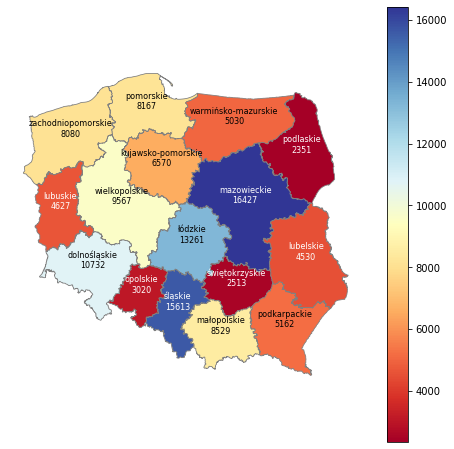

In [15]:
# Add coords for annotation
df_mapa.dropna(inplace=True)
df_mapa['coords'] = df_mapa['geometry'].apply(lambda x: x.representative_point().coords[:])
df_mapa['coords'] = [coord[0] for coord in df_mapa['coords']]

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(8,8))

# Draw map
df_mapa.plot(column='oferty', ax=ax, cmap='RdYlBu', linewidth=0.8, 
             edgecolor='gray', legend = True)

# Turn axes off
ax.axis('off')

# Annotate

for idx, row in df_mapa.iterrows():
    if row["oferty"] > 0.9 * max(df_mapa["oferty"]) or row["oferty"] < 2* min(df_mapa["oferty"]):
        annot_color = "white"
    else:
        annot_color = "black"
    text = f"{row['region']}\n{round(row['oferty'])}"
    plt.annotate(text=text, xy=(row.geometry.centroid.x, row.geometry.centroid.y), 
                 horizontalalignment='center', size=8, color=annot_color)


In [16]:
df_mapa.dtypes

JPT_KOD_JE      object
geometry      geometry
TERYT           object
region          object
oferty           int64
coords          object
dtype: object

In [17]:
df_mapa['centroids'] = df_mapa.geometry.centroid

In [18]:
df_mapa.centroids

0     POINT (499481.113 273446.549)
1     POINT (422175.325 309357.720)
2     POINT (624746.836 323304.070)
3     POINT (433921.270 699374.248)
4     POINT (761999.593 606650.468)
5     POINT (270759.933 640928.754)
6     POINT (318758.917 361174.835)
7     POINT (380773.292 497126.449)
8     POINT (727321.099 236412.613)
9     POINT (591302.832 222007.935)
10    POINT (619853.947 667542.455)
11    POINT (528825.079 415319.262)
12    POINT (643022.161 499325.588)
13    POINT (465842.300 578593.471)
14    POINT (772477.102 379460.892)
15    POINT (250102.512 487061.487)
Name: centroids, dtype: geometry